Strategy: model a microring resonator alone, and feed it a broad gaussian. Use mp.harminv() to find resonances. Be aware of numerical artifacts.

After finding a good resonance, focus on it. Add the waveguide to drive the input field. Use a thin Gaussian centered on it, and choose again a good resonance.

Use a countinuous source at the resonance, measure the dephasing as-per the paper


<font color="red">WARNING: TAKES A LOOONG TIME TO SIMULATE THE SECOND PART. </font>

If you want a fast simulation, switch to until after sources. Naturally, some field will remain in the ring, but sure.

In [1]:
%%capture 
    #Suppresses output
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -u -p /usr/local 
import os
if os.path.isdir('/content/anaconda'): root_path = '/content/anaconda'
else: root_path = '/usr/local/'
os.environ['PATH'] += f":{root_path}/bin"
!conda create -n mp -c conda-forge pymeep python=3.7 -y
print(">> ", root_path)
import sys
sys.path.append(f'{root_path}envs/mp/lib/python3.7/site-packages/')

# Meep installation, as the packages are updated there might be problems

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import meep as mp

In [185]:
# It seems that meep has no function to measure the raw values of the field passing through a point
def rawFieldFetch(simulation, volume, rawField, component=mp.Ez):
    # Computes the field at the point and saves the value inside rawField as append
    rawField.append(simulation.get_array(vol=volume, component=component))
    return

In [189]:
def DFT(series, freqs):
    # DFT routine that does not use FFT
    # Useful as it allows for denser sampling of the frequency space
    # Slow, and loses several properties such as orthonormality. Use with care
    # Frequencies are given with standard of np.fft.fft
        # https://numpy.org/doc/stable/reference/routines.fft.html
    freqs = np.array(freqs)
    DFTarray = np.zeros(len(freqs), dtype="complex")

    m = np.arange(len(series))
    for i in range(0,len(freqs)):
        f = freqs[i]    # Corresponds to k/n in notation
        wind = np.exp(-2*np.pi*1j*f*m)
        DFTarray[i] = np.sum(series*wind)
    return DFTarray

# Part 1: find resonances

In [ ]:
# Problem parameters

n = 2.5     # index of waveguide
w = 0.4       # width of waveguide
r = 2         # Inner radius of ring
pad = 4     # Padding bw waveguide and edge of PML
dpml = 2    # PML thickness

In [ ]:
# Adjust simulation parameters
cell_width = 2*(r+w+pad+dpml)
resolution = 14   # Might have to increase to 16-24, higher shouldn't be necessary
    # If problem persist ask teacher for a better configuration

# Source
fcen = 0.50    # Could choose other numbers too se higher modes
df = 0.2
nfreq = 500

     cylinder, center = (0,0,0)
          radius 2.4, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


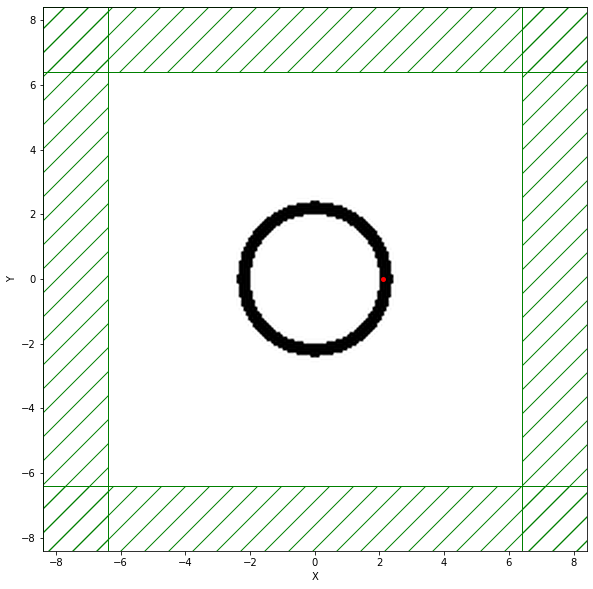

In [ ]:
# Setup simulation
try:
    sim.reset_meep()
except NameError:
    pass

cell = mp.Vector3(cell_width,cell_width,0)
pml_layers = [mp.PML(dpml)]

geometry=[
    # Ring
    mp.Cylinder(
        radius = r+w,
        material = mp.Medium(index=n)
    ),
    mp.Cylinder(
        radius = r,
        material = mp.Medium(index=1)
    )
]

# Source
source = [mp.Source(
    mp.GaussianSource(fcen, fwidth=df),
    component = mp.Ez,
    center = mp.Vector3(r+0.3*w)
)]

# Simulation
sim = mp.Simulation(
	  cell_size=cell,
	  boundary_layers = pml_layers,
	  geometry = geometry,
	  sources = source,
	  resolution = resolution
)

fig = plt.figure(figsize=[10,10])
sim.plot2D()
plt.show()

In [ ]:
#sim.run(mp.after_sources(mp.Harminv(mp.Ez, mp.Vector3(r+0.3*w), fcen, df)), until_after_sources=1300)

sim.reset_meep()

h = mp.Harminv(mp.Ez, mp.Vector3(r+0.3*w), fcen, df)
    # This function measures exponential decay, giving several parameters
    # This allows to store results in h
    # h.modes yields a table
    # Some resonances might not be real, just numerical artifact
        # These should changed substantially as details are changed slightly 

sim.run(
    mp.after_sources(h),
    until_after_sources=1300)


-----------
Initializing structure...
time for choose_chunkdivision = 0.000430107 s
Working in 2D dimensions.
Computational cell is 16.7857 x 16.7857 x 0 with resolution 14
     cylinder, center = (0,0,0)
          radius 2.4, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.158517 s
-----------


FloatProgress(value=0.0, description='0% done ', max=5050.0)

Meep progress: 250.82142857142856/5050.0 = 5.0% done in 4.0s, 76.5s to go
on time step 7057 (time=252.036), 0.000566848 s/step
Meep progress: 510.60714285714283/5050.0 = 10.1% done in 8.0s, 71.1s to go
on time step 14337 (time=512.036), 0.000549497 s/step
Meep progress: 769.8214285714286/5050.0 = 15.2% done in 12.0s, 66.7s to go
on time step 21594 (time=771.214), 0.000551235 s/step
Meep progress: 1029.4642857142856/5050.0 = 20.4% done in 16.0s, 62.5s to go
on time step 28864 (time=1030.86), 0.000550232 s/step
Meep progress: 1289.142857142857/5050.0 = 25.5% done in 20.0s, 58.4s to go
on time step 36144 (time=1290.86), 0.000549461 s/step
Meep progress: 1547.4642857142856/5050.0 = 30.6% done in 24.0s, 54.3s to go
on time step 43377 (time=1549.18), 0.00055303 s/step
Meep progress: 1806.9642857142856/5050.0 = 35.8% done in 28.0s, 50.3s to go
on time step 50648 (time=1808.86), 0.000550179 s/step
Meep progress: 2061.678571428571/5050.0 = 40.8% done in 32.0s, 46.4s to go
on time step 57781 (ti

     cylinder, center = (0,0,0)
          radius 2.4, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


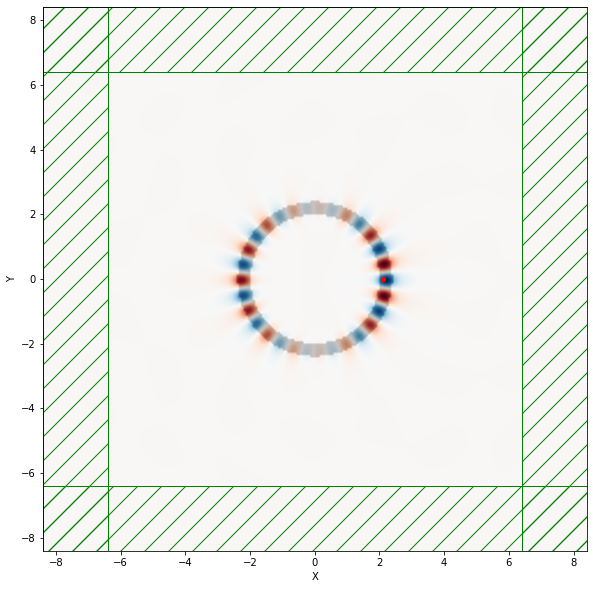

Remaining E field in simulation =  40.49380625046457


In [ ]:
# Make a plot of the electric field at the end of the simulation
ez_data = sim.get_array(size=cell, center=mp.Vector3(), component=mp.Ez)

fig = plt.figure(figsize=[10,10])
ax = plt.axes()
sim.plot2D(fields=mp.Ez)
plt.show()

print("Remaining E field in simulation = ", np.sum(ez_data**2))
# Note that full-field is in the hundreds of units of energy

In [ ]:
if "check" not in globals():
    check = 0

if(check):
    h1 = h.modes
else:
    h2 = h.modes

check = !check

In [ ]:
try:
    print(f"N_modes = {len(h1)}")
    for i in h1:
        print(i)
    print("\n\n")
    print(f"N_modes = {len(h1)}")
    for i in h2:
        print(i)
except:
    print("Need to load another harminv to memory")
# Decay is the imaginary part of omega, see documentation
# https://meep.readthedocs.io/en/latest/Python_Tutorials/Basics/#modes-of-a-ring-resonator

N_modes = 7
Mode(freq=0.40684310612259195, decay=-1.2450734108907089e-05, Q=16338.117197103335, amp=(-0.0020505698581868+0.004134692767705255j), err=(2.03276345775984e-07+0j))
Mode(freq=0.4348891825750094, decay=-4.293233352854981e-06, Q=50648.21159625647, amp=(-0.024615291019677087-0.02309482847417164j), err=(2.5362067454339325e-08+0j))
Mode(freq=0.46261098710889426, decay=-1.7074384989952117e-06, Q=135469.29724881166, amp=(0.09961421216888817-0.05015001876451412j), err=(3.6492635045703376e-09+0j))
Mode(freq=0.49009617979731873, decay=-1.2643636630254376e-06, Q=193811.3986226835, amp=(0.013454863917989009+0.16954052713737j), err=(4.315184655016014e-09+0j))
Mode(freq=0.5173310488014219, decay=-7.09932095164129e-07, Q=364352.48689652514, amp=(-0.11694447329528643-0.04334199471302685j), err=(5.293550203782517e-09+0j))
Mode(freq=0.5444297300325817, decay=-2.4939178736870973e-06, Q=109151.49527912827, amp=(0.031834768502641685-0.030650581003686915j), err=(1.3368098711363322e-08+0j))
Mode(f

# Part 2: focus on chosen mode

In [360]:
# Problem parameters

n = 2.5     # index of waveguide
w = 0.40       # width of waveguide
r = 2         # Inner radius of ring
pad = 1     # Padding bw waveguide and edge of PML
dpml = 1    # PML thickness

# Problem parameters
sep = 0.45  # Coupling distance
    # When using until_field_decayed
        # 0.40    overcoupling (very slightly)
        # 0.40    undercoupling (very slightly)
    # When using until_after_sources = 800
        # 0.2725 undercoupling
        # 0.27 overcoupling  (very slightly)
nWG = n
wWG = w

# Source
fcen = 0.546  # 0.517
df = 0.04
nfreq = 500


# Adjust simulation parameters
cell_width = 2*(r+w+pad+dpml)
cell_height = 2*(r+w+pad/2+dpml+wWG + sep)
resolution = 20   # Might have to increase to 16-24, higher shouldn't be necessary
    # If problem persist ask teacher for a better configuration


     block, center = (0,-3.05,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0,0,0)
          radius 2.4, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


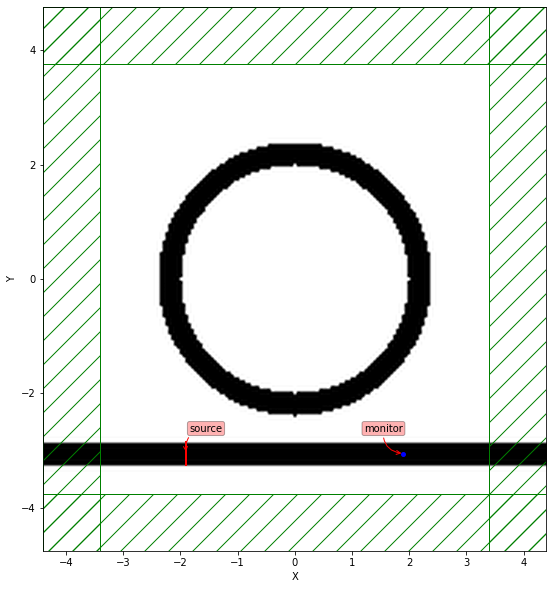

In [365]:
# Choose mode of execution
normalization = 0

try:
    sim.reset_meep()
except NameError:
    pass

checkSim = 1

cell = mp.Vector3(cell_width,cell_height,0)
pml_layers = [mp.PML(dpml)]

geometry = [
    mp.Block(
        mp.Vector3(mp.inf,w,mp.inf),
        center = mp.Vector3(0,-r-w-sep-wWG/2,0),
        material = mp.Medium(index=nWG)
    )]


# Source
source = [mp.Source(
    mp.GaussianSource(fcen, fwidth=df*2),
    component = mp.Ez,
    center = mp.Vector3(-cell_width/2+2.5,-r-w-sep-wWG/2,0),
    size = mp.Vector3(0., wWG, 0.)
)]

if not normalization:
    # Ring
    geometry.append(
        mp.Cylinder(
            radius = r+w,
            material = mp.Medium(index=n)
        ))
    geometry.append(
        mp.Cylinder(
            radius = r,
            material = mp.Medium(index=1)
        ))

# Simulation
sim = mp.Simulation(
	  cell_size=cell,
	  boundary_layers = pml_layers,
	  geometry = geometry,
	  sources = source,
	  resolution = resolution
)

# Detector
trans_fr = mp.FluxRegion(
    #"""center = mp.Vector3(cell_width/2-2.5,-r-w-sep-wWG/2,0),
    #size = mp.Vector3(0, wWG, 0)"""
    center = mp.Vector3(cell_width/2-2.5,-r-w-sep-wWG/2,0),
    size = mp.Vector3(0, 0, 0),   # Fetch single point, should be sufficient
    direction = mp.X
)
tran = sim.add_flux(fcen, df, nfreq, trans_fr)

fig = plt.figure(figsize=[10,10])
sim.plot2D(labels=True)
#plt.savefig("MicroringSimplot.svg", bbox_inches="tight")
plt.show()

In [366]:
# Safety countermeasure
# sim.reset_meep()   #This removes flux region!
if (not checkSim):
    raise Exception("Run Cell above to prevent crashing")
checkSim = 0

vol_meas = mp.Volume(
    center = mp.Vector3(cell_width/2-2.5,-r-w-sep-wWG/2,0),
    size = mp.Vector3(0, 0, 0)   # Fetch single point, should be sufficient
    )
ez_sequential = []

"""fig = plt.figure(figsize=[10,10])
    Anim = mp.Animate2D(sim, fields=mp.Ez, f=fig, realtime=False, normalize=True)

    sim.run(
        mp.at_every(1/fcen/5, Anim),   # Need to be careful about oversampling
        # The video might be very heavy and crash the system
        mp.after_sources(h),
        until_after_sources=1300)
    plt.close()

    Anim.to_mp4(5, "video.mp4")
    del Anim"""
if normalization:
    sim.run(
        lambda sim: rawFieldFetch(sim, vol_meas, ez_sequential),

        until_after_sources=400
        #until_after_sources=mp.stop_when_fields_decayed(100,mp.Ez,mp.Vector3(0,r+w/2,0),1e-2)
    )
else:
    sim.run(
        lambda sim: rawFieldFetch(sim, vol_meas, ez_sequential),
     
        #until_after_sources=1500
        until_after_sources=mp.stop_when_fields_decayed(100,mp.Ez,mp.Vector3(0,r+w/2,0),1e-2)
        )

ez_sequential = np.array(ez_sequential)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000310183 s
Working in 2D dimensions.
Computational cell is 8.8 x 9.5 x 0 with resolution 20
     block, center = (0,-3.05,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0,0,0)
          radius 2.4, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.131505 s
-----------
field decay(t = 100.025): 0.00034216148018678574 / 0.00034216148018678574 = 1.0
field decay(t = 200.05): 0.00035172072520449766 / 0.00035172072520449766 = 1.0
field decay(t = 300.075): 0.000344423237137036 / 0.00035172072520449766 = 0.9792520384938398
on time step 13563 (time=339.075), 0.000294954 s/step
field decay(t = 400.1):

     block, center = (0,-3.05,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0,0,0)
          radius 2.4, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


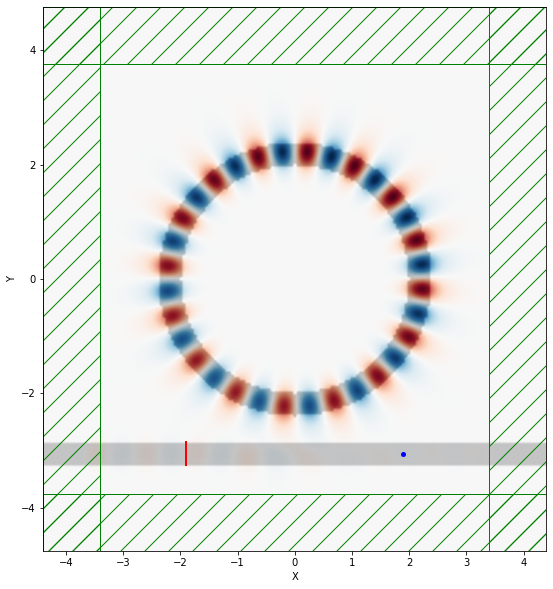

Remaining E field in simulation =  0.003049681108266617


In [367]:
# Make a plot of the electric field at the end of the simulation
ez_data = sim.get_array(size=cell, center=mp.Vector3(), component=mp.Ez)

fig = plt.figure(figsize=[10,10])
ax = plt.axes()
sim.plot2D(fields=mp.Ez)
plt.show()

print("Remaining E field in simulation = ", np.sum(ez_data**2))
# Note that full-field is in the hundreds of units of energy

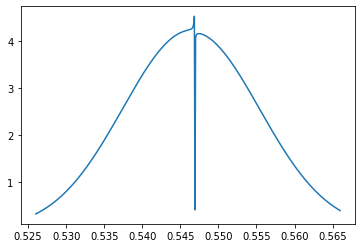

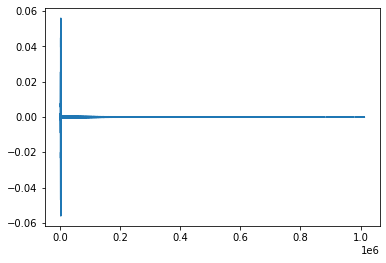

In [368]:
freqs = np.array(mp.get_flux_freqs(tran))

plt.plot(freqs,mp.get_fluxes(tran))
plt.figure()
plt.plot(ez_sequential)

if(normalization):
    meas_flux0 = mp.get_fluxes(tran)
    ez_sequential0 = ez_sequential
else:
    meas_flux1 = mp.get_fluxes(tran)
    ez_sequential1 = ez_sequential




## Approach: use DFT
Problem: using FFT the frequency resolution is too low to see the rejection in the case of a lossless microring. I can choose to introduce losses or use directly DFT
Slow to compute but should be effective.

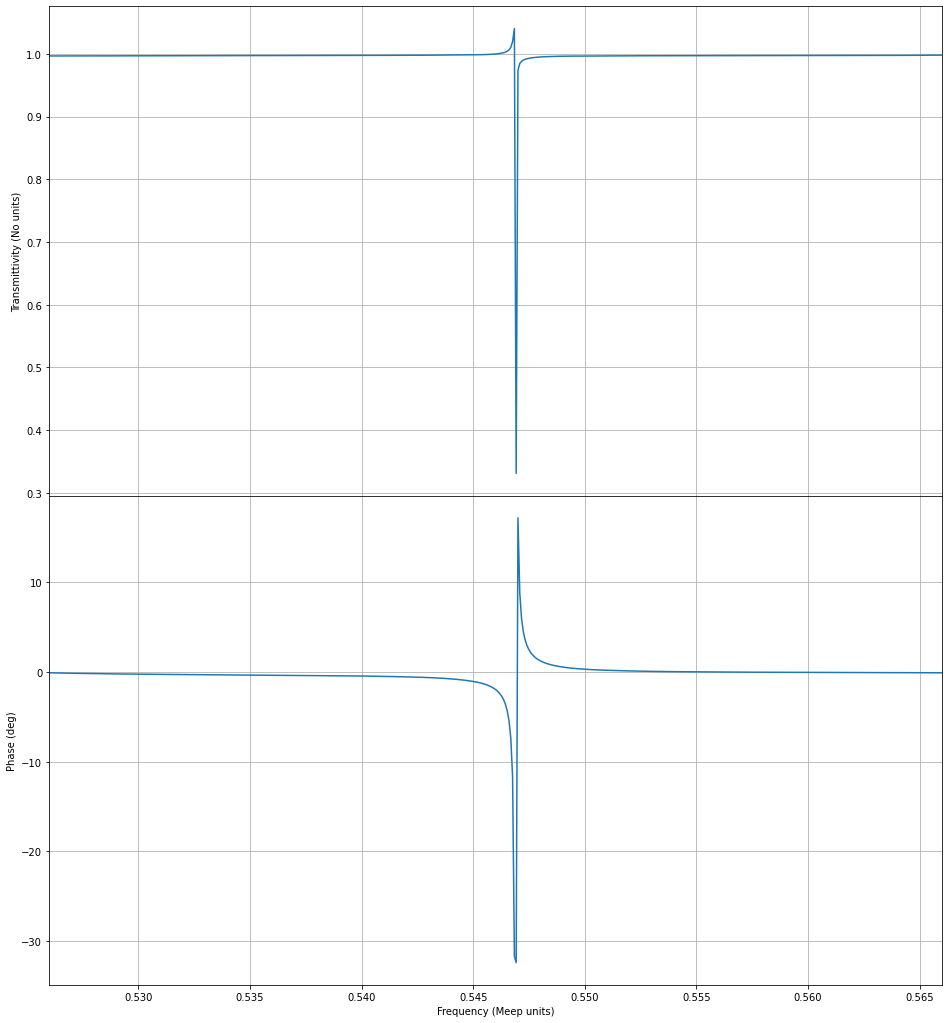

In [370]:
""" # This gives same result as above, to check whether it is coherent with FFT
test = DFT(ez_sequential1, freqs_fft[cond])/DFT(ez_sequential0, freqs_fft[cond])
plt.plot(freqs_sim[cond],np.angle(test))
"""
timestep = 0.5/resolution
    # See https://meep.readthedocs.io/en/latest/Introduction/

## Compute the transfer function
HDFT = DFT(ez_sequential1, freqs*timestep)/DFT(ez_sequential0, freqs*timestep)


# Transmission plot
fig, ax = plt.subplots(2,1, sharex=True, figsize=[16,18])
plt.subplots_adjust(hspace=.0)

plt.xlim(np.min(freqs), np.max(freqs))
ax[0].plot(freqs, np.abs(HDFT),
        #ls = " ", marker = ".", markersize = 7
         label = "DFT routine")

plt.xlabel(r"Frequency (Meep units)")

# Check if the result is similar to fluxregion (it is)
#ax[0].plot(freqs, np.array(meas_flux1)/np.array(meas_flux0),
#           label = "Meep fluxRegion")


ax[0].grid()
ax[0].set_ylabel("Transmittivity (No units)")
#ax[0].legend()

# Angle plot
ax[1].plot(freqs, np.unwrap(np.angle(HDFT))*180/np.pi)

ax[1].grid()
ax[1].set_ylabel("Phase (deg)")

plt.savefig("MicroringTransferFunction.svg", format = "svg", bbox_inches='tight')

## Scrapped Approach: use FFT
I need to reproduce the graph above using my own fft measurement

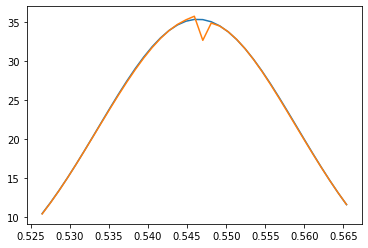

In [169]:
# Produce fft space
# Frequency space
timestep = 0.5/resolution
    # See https://meep.readthedocs.io/en/latest/Introduction/

from scipy.signal import blackman
freqs_fft = np.fft.fftfreq(len(ez_sequential0))
freqs_sim = freqs_fft/timestep

# Choose the windowing method
    # Seems like a horrible idea on inhomogeneous data
#window = blackman(len(ez_sequential0))    
#window = np.ones(len(ez_sequential0))

cond = np.logical_and((freqs_sim < fcen+df/2), (freqs_sim > fcen-df/2))

fft0 = np.fft.fft(ez_sequential0)
plt.plot(freqs_sim[cond], np.abs(fft0)[cond])

fft1 = np.fft.fft(ez_sequential1)
plt.plot(freqs_sim[cond], np.abs(fft1)[cond])



(0.5264722575065538, 0.5653901245912272)

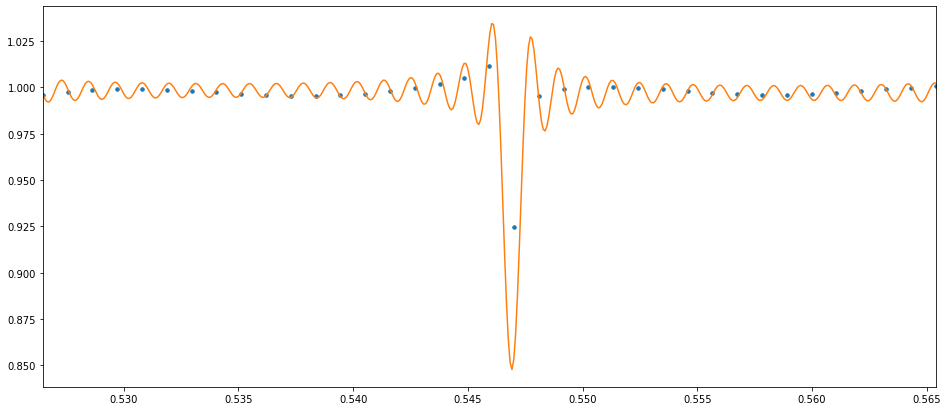

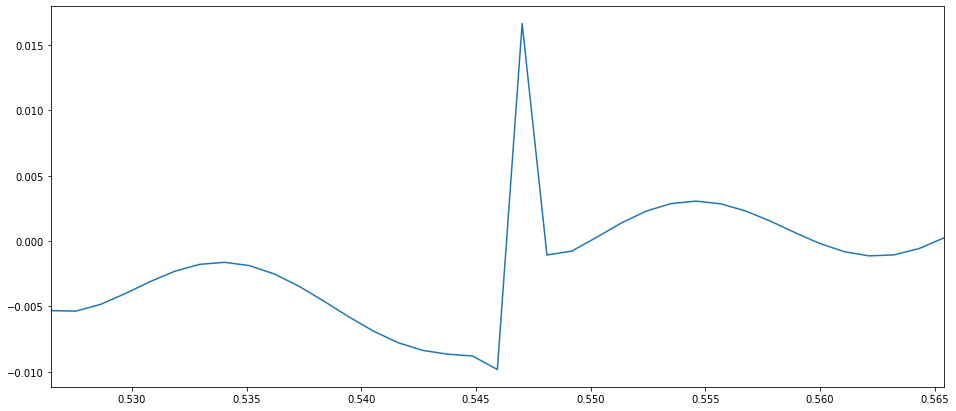

In [170]:
## Compute the transfer function
H = fft1/fft0

plt.figure(figsize=[16,7])
ax = plt.axes()
plt.xlim(np.min(freqs_sim[cond]), np.max(freqs_sim[cond]))
plt.plot(freqs_sim[cond], np.abs(H[cond]),
        ls = " ", marker = ".", markersize = 7)
#ax.set_ylim(*ax.get_ylim())

plt.plot(freqs, np.array(meas_flux1)/np.array(meas_flux0))

plt.figure(figsize=[16,7])
ax = plt.axes()
plt.plot(freqs_sim[cond], np.angle(H[cond]))
plt.xlim(np.min(freqs_sim[cond]), np.max(freqs_sim[cond]))